Un banco recibe en promedio $(\lambda = 4)$ clientes por hora (llegadas Poisson) y atiende cada cajero a razón de $(\mu = 2)$ clientes por hora (servicio exponencial). El banco puede contratar \(s\) cajeros paralelos.


*  El costo de espera es de \$10 por cliente-hora en cola.
*  El costo de servicio es de \$15 por cajero-hora.


Se busca determinar el número óptimo de cajeros \(s\) que minimice el costo total:
$$
C(s) = 10\,L_q(s) \;+\; 15\,s
$$
donde $(L_q(s))$ es el número promedio de clientes en cola en el sistema M/M/s.

# Defino el problema

Clientes en cola al final: 13
Costo total = 10*13 + 15*2 = 160.00


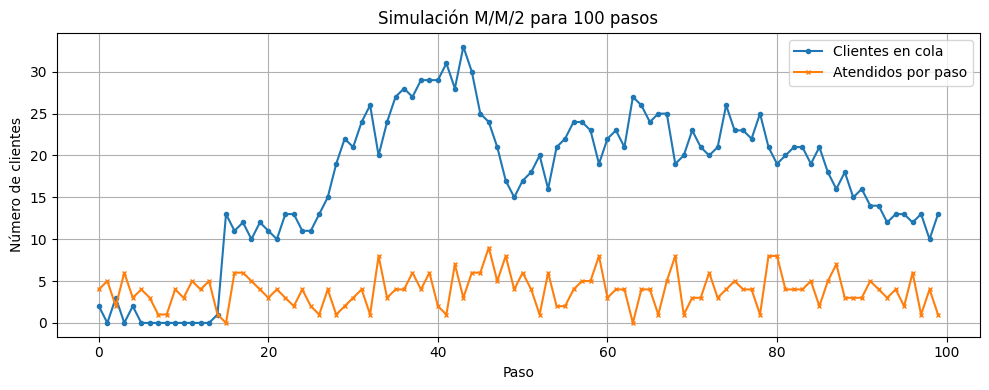

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
rate_llegada   = 4    # lambda (llegadas/hora)
rate_atencion  = 2    # mu     (servicios por servidor por hora)
s              = 2    # número de servidores
n_pasos        = 100  # número de intervalos
costo_espera   = 10   # costo por cliente en cola
costo_servidor = 15   # costo por servidor

# Historial
hist_cola      = []
hist_atendidos = []

# Estado inicial
cola = 0

for paso in range(n_pasos):
    # 1) Llegadas: Poisson(lambda * dt)
    llegadas = np.random.poisson(rate_llegada)
    cola += llegadas

    # 2) Atenciones: Poisson(s * mu * dt), hasta agotar la cola
    capacidad = np.random.poisson(s * rate_atencion)
    atendidos = min(cola, capacidad)
    cola -= atendidos

    # 3) Guardar historial
    hist_cola.append(cola)
    hist_atendidos.append(atendidos)

# 4) Costo final
cola_final = hist_cola[-1]
costo_total = costo_espera * cola_final + costo_servidor * s

print(f"Clientes en cola al final: {cola_final}")
print(f"Costo total = {costo_espera}*{cola_final} + {costo_servidor}*{s} = {costo_total:.2f}")

# 5) Gráfica
plt.figure(figsize=(10,4))
plt.plot(hist_cola,      label="Clientes en cola",    marker='o', markersize=3)
plt.plot(hist_atendidos, label="Atendidos por paso", marker='x', markersize=3)
plt.xlabel("Paso")
plt.ylabel("Número de clientes")
plt.title(f"Simulación M/M/{s} para {n_pasos} pasos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Diferentes s

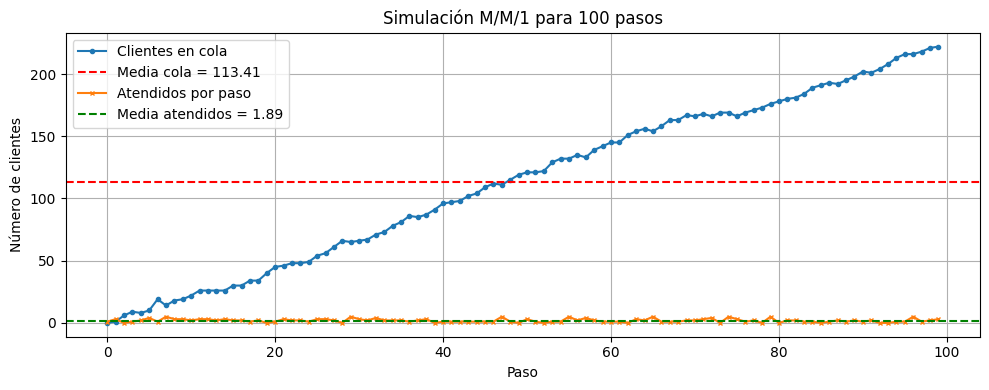

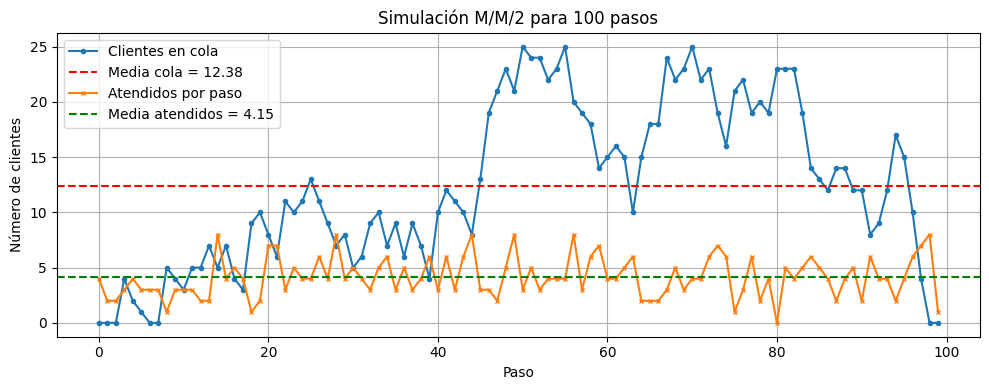

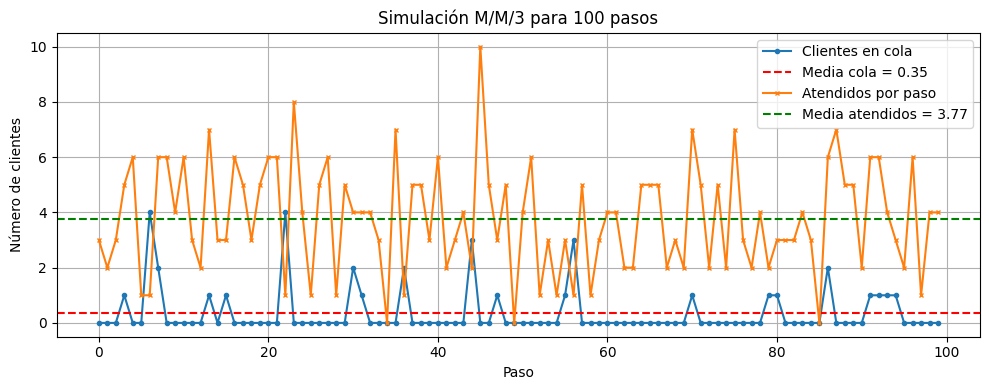

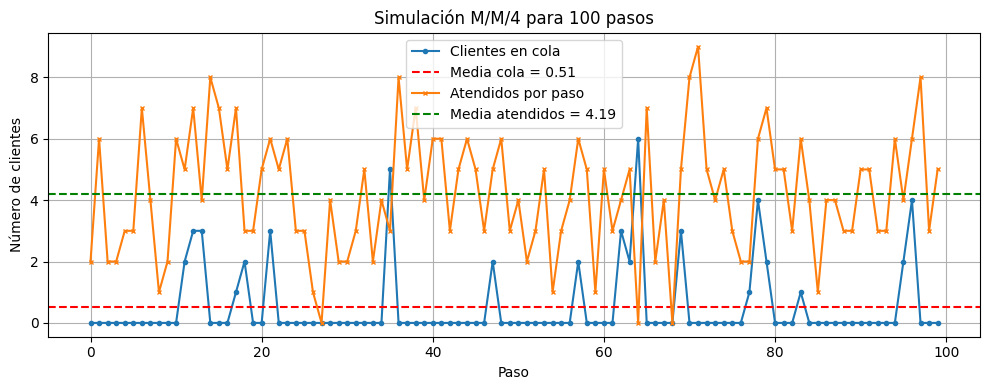

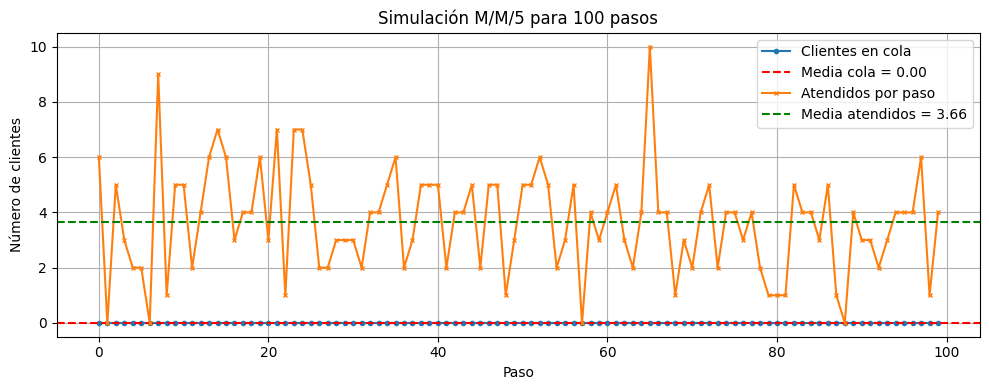

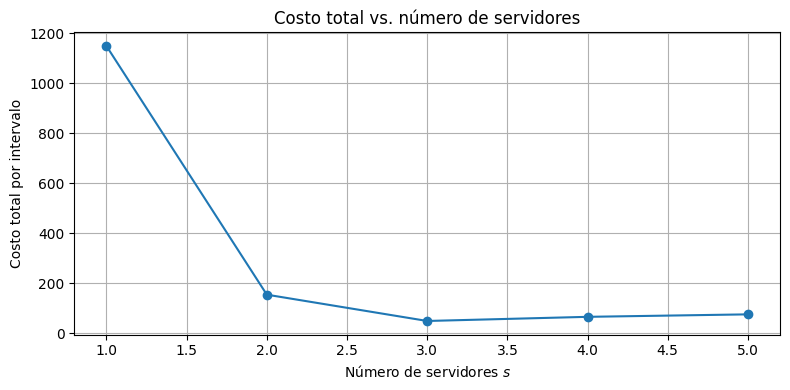

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros base
rate_llegada   = 4    # lambda (llegadas/hora)
rate_atencion  = 2    # mu     (servicios por servidor por hora)
s_max          = 5    # número máximo de servidores a probar
n_pasos        = 100  # número de intervalos
costo_espera   = 10   # costo por cliente en cola (por intervalo)
costo_servidor = 15   # costo por servidor (por intervalo)

def M_M_s(rate_llegada, rate_atencion, s, n_pasos, costo_espera, costo_servidor):
    """
    Simula un sistema M/M/s discretizado en n_pasos.
    Retorna:
      hist_cola      : lista con la longitud de cola en cada paso
      hist_atendidos : lista con atendidos en cada paso
      cola_final     : longitud de cola al final de la simulación
      costo_total    : costo = costo_espera * media_cola + costo_servidor * s
    """
    hist_cola      = []
    hist_atendidos = []
    cola = 0

    for paso in range(n_pasos):
        # 1) Llegadas: Poisson(rate_llegada)
        llegadas = np.random.poisson(rate_llegada)
        cola += llegadas

        # 2) Atenciones: Poisson(s * rate_atencion)
        capacidad = np.random.poisson(s * rate_atencion)
        atendidos = min(cola, capacidad)
        cola -= atendidos

        # 3) Guardar historial
        hist_cola.append(cola)
        hist_atendidos.append(atendidos)

    media_cola   = np.mean(hist_cola)
    costo_total  = costo_espera * media_cola + costo_servidor * s

    return hist_cola, hist_atendidos, costo_total

# Simular para s = 1 ... s_max
costos_totales = []
for i in range(1, s_max + 1):
    hist_cola, hist_atendidos, costo_total = M_M_s(
        rate_llegada, rate_atencion, i, n_pasos, costo_espera, costo_servidor)
    costos_totales.append(costo_total)

    # Gráfico de evolución para cada s
    plt.figure(figsize=(10,4))
    plt.plot(hist_cola,      label="Clientes en cola",    marker='o', markersize=3)
    plt.axhline(np.mean(hist_cola), color='r', linestyle='--',
                label=f"Media cola = {np.mean(hist_cola):.2f}")
    plt.plot(hist_atendidos, label="Atendidos por paso", marker='x', markersize=3)
    plt.axhline(np.mean(hist_atendidos), color='g', linestyle='--',
                label=f"Media atendidos = {np.mean(hist_atendidos):.2f}")
    plt.xlabel("Paso")
    plt.ylabel("Número de clientes")
    plt.title(f"Simulación M/M/{i} para {n_pasos} pasos")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráfico de costos totales vs número de servidores
plt.figure(figsize=(8,4))
plt.plot(range(1, s_max+1), costos_totales, '-o')
plt.xlabel("Número de servidores $s$")
plt.ylabel("Costo total por intervalo")
plt.title("Costo total vs. número de servidores")
plt.grid(True)
plt.tight_layout()
plt.show()


# Moente Carlo

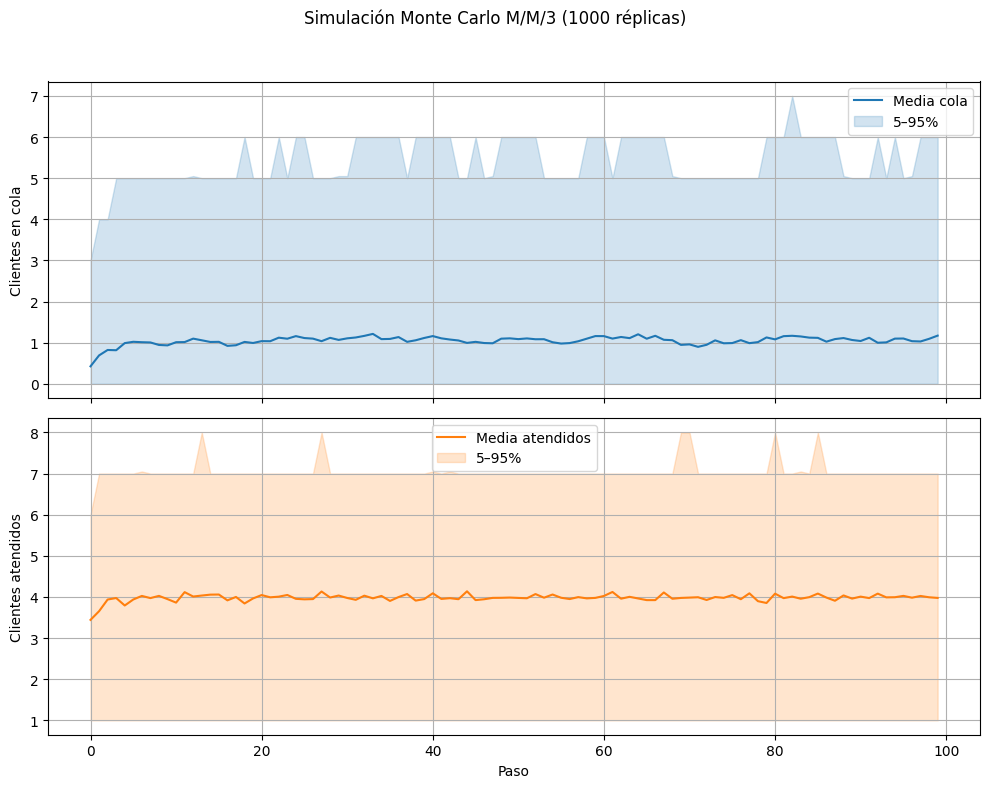

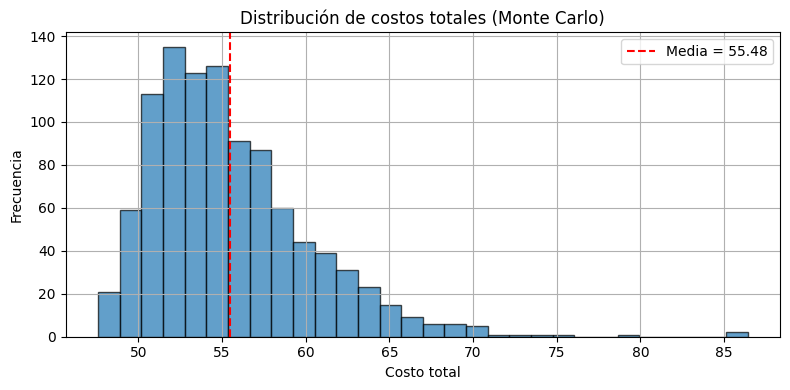

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros base
rate_llegada   = 4
rate_atencion  = 2
s              = 3     # fijamos s=3
n_pasos        = 100
costo_espera   = 10
costo_servidor = 15
n_rep          = 1000  # número de réplicas Monte Carlo

# Función simulación
def M_M_s(rate_llegada, rate_atencion, s, n_pasos, costo_espera, costo_servidor):
    hist_cola = []
    hist_atendidos = []
    cola = 0

    for _ in range(n_pasos):
        # Llegadas y atenciones como procesos Poisson
        llegadas  = np.random.poisson(rate_llegada)
        capacidad = np.random.poisson(s * rate_atencion)
        cola += llegadas
        atendidos = min(cola, capacidad)
        cola -= atendidos

        hist_cola.append(cola)
        hist_atendidos.append(atendidos)

    media_cola  = np.mean(hist_cola)
    costo_total = costo_espera * media_cola + costo_servidor * s
    return np.array(hist_cola), np.array(hist_atendidos), costo_total

# Almacenar todos los históricos
all_colas      = np.zeros((n_rep, n_pasos))
all_atendidos  = np.zeros((n_rep, n_pasos))
all_costos     = np.zeros(n_rep)

for i in range(n_rep):
    hc, ha, ctot = M_M_s(rate_llegada, rate_atencion, s, n_pasos, costo_espera, costo_servidor)
    all_colas[i]     = hc
    all_atendidos[i] = ha
    all_costos[i]    = ctot

# Calcular estadísticos
mean_cola     = all_colas.mean(axis=0)
p5_cola, p95_cola = np.percentile(all_colas, [5,95], axis=0)

mean_atendidos    = all_atendidos.mean(axis=0)
p5_att, p95_att   = np.percentile(all_atendidos, [5,95], axis=0)

# 1) Trayectorias promedio con bandas 5-95%
fig, axes = plt.subplots(2,1, figsize=(10,8), sharex=True)

# Cola
axes[0].plot(mean_cola, color='C0', label='Media cola')
axes[0].fill_between(range(n_pasos), p5_cola, p95_cola, color='C0', alpha=0.2, label='5–95%')
axes[0].set_ylabel('Clientes en cola')
axes[0].legend()
axes[0].grid(True)

# Atendidos
axes[1].plot(mean_atendidos, color='C1', label='Media atendidos')
axes[1].fill_between(range(n_pasos), p5_att, p95_att, color='C1', alpha=0.2, label='5–95%')
axes[1].set_xlabel('Paso')
axes[1].set_ylabel('Clientes atendidos')
axes[1].legend()
axes[1].grid(True)

plt.suptitle(f'Simulación Monte Carlo M/M/{s} ({n_rep} réplicas)')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 2) Histograma de costos
plt.figure(figsize=(8,4))
plt.hist(all_costos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(all_costos.mean(), color='r', linestyle='--', label=f'Media = {all_costos.mean():.2f}')
plt.xlabel('Costo total')
plt.ylabel('Frecuencia')
plt.title('Distribución de costos totales (Monte Carlo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Monte Carlo diferentes s

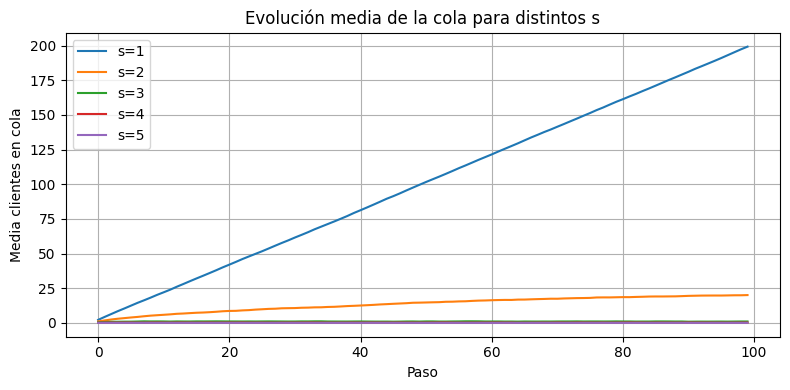

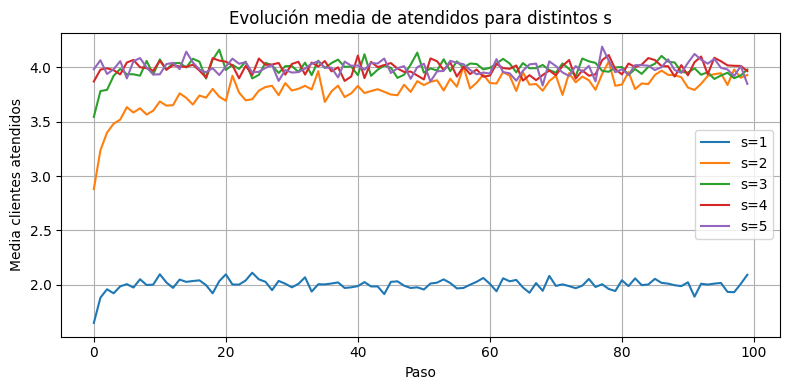

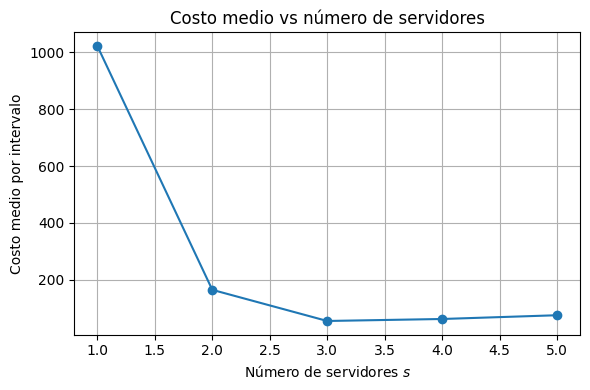

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros base
rate_llegada   = 4
rate_atencion  = 2
s_max          = 5
n_pasos        = 100
costo_espera   = 10
costo_servidor = 15
n_rep          = 1000

def M_M_s(rate_llegada, rate_atencion, s, n_pasos, costo_espera, costo_servidor):
    hist_cola = np.zeros(n_pasos)
    hist_att  = np.zeros(n_pasos)
    cola = 0
    for t in range(n_pasos):
        # Llegadas
        cola += np.random.poisson(rate_llegada)
        # Atenciones
        atend = min(cola, np.random.poisson(s * rate_atencion))
        cola -= atend
        hist_cola[t] = cola
        hist_att[t]  = atend
    media_cola = hist_cola.mean()
    costo_total = costo_espera * media_cola + costo_servidor * s
    return hist_cola, hist_att, costo_total

# Arrays para almacenar resultados
cola_means   = np.zeros((s_max, n_pasos))
att_means    = np.zeros((s_max, n_pasos))
costos_means = np.zeros(s_max)

# Bucle sobre s
for s in range(1, s_max + 1):
    all_colas = np.zeros((n_rep, n_pasos))
    all_atts  = np.zeros((n_rep, n_pasos))
    all_costs = np.zeros(n_rep)

    # Réplicas Monte Carlo
    for i in range(n_rep):
        hc, ha, ctot = M_M_s(rate_llegada, rate_atencion, s, n_pasos, costo_espera, costo_servidor)
        all_colas[i] = hc
        all_atts[i]  = ha
        all_costs[i] = ctot

    # Medias temporales (sobre réplicas)
    cola_means[s-1]   = all_colas.mean(axis=0)
    att_means[s-1]    = all_atts.mean(axis=0)
    costos_means[s-1] = all_costs.mean()

# 1) Plot de medias de cola a lo largo del tiempo, un curve por cada s
plt.figure(figsize=(8,4))
for idx in range(s_max):
    plt.plot(cola_means[idx], label=f's={idx+1}')
plt.xlabel('Paso')
plt.ylabel('Media clientes en cola')
plt.title('Evolución media de la cola para distintos s')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 2) Plot de medias de atendidos a lo largo del tiempo
plt.figure(figsize=(8,4))
for idx in range(s_max):
    plt.plot(att_means[idx], label=f's={idx+1}')
plt.xlabel('Paso')
plt.ylabel('Media clientes atendidos')
plt.title('Evolución media de atendidos para distintos s')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 3) Plot del costo medio final vs s
plt.figure(figsize=(6,4))
plt.plot(range(1, s_max+1), costos_means, '-o')
plt.xlabel('Número de servidores $s$')
plt.ylabel('Costo medio por intervalo')
plt.title('Costo medio vs número de servidores')
plt.grid(True)
plt.tight_layout()

plt.show()


Una empresa de soporte técnico recibe, en promedio, 6 computadoras por hora para su revisión. Cada técnico tarda en promedio 20 minutos en diagnosticar y resolver los problemas de una computadora, lo que equivale a una tasa de servicio de 3 computadoras por hora.

Las computadoras que se encuentran dentro de la empresa, pero aún no han sido atendidas, generan un costo operativo de $12 por hora debido a su permanencia en espera. Con el objetivo de optimizar el proceso y reducir los tiempos de espera, la empresa evalúa la posibilidad de asignar s técnicos que trabajen en paralelo.

No obstante, contratar cada técnico implica un costo de $20 por hora. La empresa desea determinar el número óptimo de técnicos que minimice el costo total por hora, compuesto por los costos de espera y de servicio.

a) Modele este sistema en notación de Kendall, explicando qué representa cada símbolo.

b) Calcule la capacidad productiva total del sistema (en computadoras por hora) y el grado de utilización con
𝑠
=
3
s=3 técnicos. Interprete el resultado.

c) Calcule el número promedio de computadoras en cola
𝐿
𝑞
L
q
​
  y el tiempo promedio en cola
𝑊
𝑞
W
q
​
  si hay solo un técnico disponible.

d) ¿Cuál es la probabilidad de que haya exactamente 4 computadoras en cola en ese caso?

e) Suponga ahora que por razones operativas solo se permite que haya como máximo 5 computadoras esperando en el sistema (es decir, se transforma en un modelo M/M/s/K). Calcule nuevamente los valores anteriores para este sistema con
𝑠
=
3
s=3 y
𝐾
=
8
K=8.
